# Relatório 3 – Interpolação e Ajuste de Função

Nome: Ricardo Coutinho Cordeiro

Professora: Larissa A. de Freitas

Nota: 10

#**Bibliotecas Utilizadas**

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#**Métodos Utilizados**

###**Lagrange**

In [ ]:
def laGrande(numero_pontos, valores_x, valores_y, ponto_desejado):
    valor_polinomio = 0  # Inicializa o valor do polinômio interpolador

    for i in range(numero_pontos):
        numerador = 1  # Inicializa o valor do numerador do termo de Lagrange
        denominador = 1  # Inicializa o valor do denominador do termo de Lagrange

        for j in range(numero_pontos):
            if i != j:
                numerador *= (ponto_desejado - valores_x[j])  # Calcula o numerador usando as diferenças entre os valores x
                denominador *= (valores_x[i] - valores_x[j])  # Calcula o denominador usando as diferenças entre os valores x

        valor_polinomio += valores_y[i] * numerador / denominador  # Adiciona a contribuição do termo atual ao valor do polinômio

    return valor_polinomio  # Retorna o valor do polinômio interpolador no ponto desejado


###**Newton**

In [ ]:
def newton(numero_pontos, valores_x, valores_y, ponto_desejado):
    # Inicializa uma matriz delta para armazenar as diferenças divididas
    delta = [[0] * numero_pontos for _ in range(numero_pontos)]

    # Preenche a primeira coluna da matriz delta com os valores de y (ordVet)
    for i in range(numero_pontos):
        delta[i][0] = valores_y[i]

    # Calcula as diferenças divididas
    for j in range(1, numero_pontos):
        for i in range(numero_pontos - j):
            # Fórmula das diferenças divididas: delta[i][j] = (delta[i+1][j-1] - delta[i][j-1]) / (valores_x[i+j] - valores_x[i])
            delta[i][j] = (delta[i+1][j-1] - delta[i][j-1]) / (valores_x[i+j] - valores_x[i])

    # Inicializa o valor do polinômio interpolador com o valor da diagonal superior da matriz delta
    valor_polinomio = delta[0][0]

    # Calcula o valor do polinômio interpolador no ponto desejado
    for j in range(1, numero_pontos):
        termo = delta[0][j]
        for i in range(j):
            termo *= (ponto_desejado - valores_x[i])  # Multiplica o termo pelo valor de (x - x[i])
        valor_polinomio += termo

    return valor_polinomio  # Retorna o valor do polinômio interpolador no ponto desejado


###**Spline Cúbica Natural**

In [ ]:
def spline(numero_pontos, valores_x, valores_y, ponto_desejado):
    h = np.diff(valores_x)  # Calcula os intervalos entre os pontos
    delta = np.zeros((numero_pontos, numero_pontos))  # Inicializa a matriz delta
    rhs = np.zeros(numero_pontos)  # Inicializa o vetor rhs (lado direito do sistema)

    # Preenche a matriz delta com os coeficientes
    delta[0, 0] = 1
    delta[numero_pontos - 1, numero_pontos - 1] = 1
    for i in range(1, numero_pontos - 1):
        delta[i, i - 1] = h[i - 1]
        delta[i, i] = 2 * (h[i - 1] + h[i])
        delta[i, i + 1] = h[i]

    # Calcula o vetor rhs
    for i in range(1, numero_pontos - 1):
        rhs[i] = 3 * ((valores_y[i + 1] - valores_y[i]) / h[i] - (valores_y[i] - valores_y[i - 1]) / h[i - 1])

    # Eliminação de Gauss para resolver o sistema tridiagonal
    for i in range(1, numero_pontos):
        factor = delta[i, i - 1] / delta[i - 1, i - 1]
        delta[i, i] -= factor * delta[i - 1, i]
        rhs[i] -= factor * rhs[i - 1]

    coefs = np.zeros(numero_pontos)  # Inicializa o vetor de coeficientes
    coefs[-1] = rhs[-1] / delta[-1, -1]

    # Retrosubstituição para encontrar os coeficientes
    for i in range(numero_pontos - 2, -1, -1):
        coefs[i] = (rhs[i] - delta[i, i + 1] * coefs[i + 1]) / delta[i, i]

    i = np.searchsorted(valores_x, ponto_desejado)  # Encontra o intervalo no qual o ponto desejado está

    # Ajusta o índice caso o ponto esteja fora do intervalo
    if i == 0:
        i = 1
    elif i == numero_pontos:
        i = numero_pontos - 1

    hi = valores_x[i] - valores_x[i - 1]  # Calcula a diferença entre os pontos no intervalo
    a = coefs[i - 1] * (valores_x[i] - ponto_desejado) ** 3 / (6 * hi)
    b = coefs[i] * (ponto_desejado - valores_x[i - 1]) ** 3 / (6 * hi)
    c = (valores_y[i - 1] - coefs[i - 1] * hi ** 2 / 6) * (valores_x[i] - ponto_desejado) / hi
    d = (valores_y[i] - coefs[i] * hi ** 2 / 6) * (ponto_desejado - valores_x[i - 1]) / hi

    valor_polinomio = a + b + c + d  # Calcula o valor do polinômio interpolador

    return valor_polinomio  # Retorna o valor do polinômio interpolador no ponto desejado


###**Método dos Mínimos Quadrados**

In [ ]:
def mmq(valores_x, valores_y, grau):
    numero_pontos = len(valores_x)  # Número de pontos
    matriz_h = np.zeros((grau + 1, numero_pontos))  # Inicializa a matriz h

    # Preenche a matriz h com as potências de x
    for i in range(len(matriz_h)):
        for k in range(len(matriz_h[0])):
            matriz_h[i, k] = pow(valores_x[k], i)

    matriz_A = np.zeros((grau + 1, grau + 1))  # Inicializa a matriz A
    vetor_b = np.zeros((grau + 1))  # Inicializa o vetor b

    # Preenche a matriz A e o vetor b com os produtos internos
    for i in range(len(matriz_A)):
        for k in range(len(matriz_A)):
            matriz_A[i, k] = matriz_h[i].dot(matriz_h[k])
        vetor_b[i] = matriz_h[i].dot(valores_y)

    coeficientes = np.linalg.solve(matriz_A, vetor_b)  # Resolve o sistema linear

    return coeficientes  # Retorna os coeficientes da função polinomial

# **Exercícios**

#1.

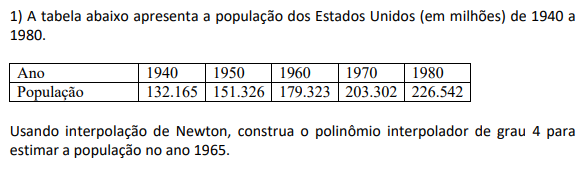

In [ ]:
anos = [1940, 1950, 1960, 1970, 1980]
populacao = [132.165, 151.326, 179.323, 203.302, 226.542]

numero_pontos = 5
valores_x = anos
valores_y = populacao
ponto_desejado = 1965

# Calcula o valor interpolado
populacao_1965 = newton(numero_pontos, valores_x, valores_y, ponto_desejado)
print(f"A estimativa da população no ano 1965 é: {populacao_1965:.3f} milhões")

A estimativa da população no ano 1965 é: 191.988 milhões


#2.

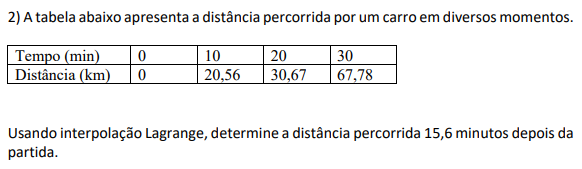

In [ ]:
# Dados fornecidos
tempos = [0, 10, 20, 30]  # Valores de x (tempo em minutos)
distancias = [0, 20.56, 30.67, 67.78]  # Valores de y (distância em km)

# Ponto desejado para interpolação
ponto_desejado = 15.6

# Usando a função laGrande para calcular a distância interpolada
distancia_interpolada = laGrande(len(tempos), tempos, distancias, ponto_desejado)

# Exibindo o resultado
print("A distância percorrida 15,6 minutos depois da partida é:", distancia_interpolada, "km")


A distância percorrida 15,6 minutos depois da partida é: 25.1098432 km


#3.

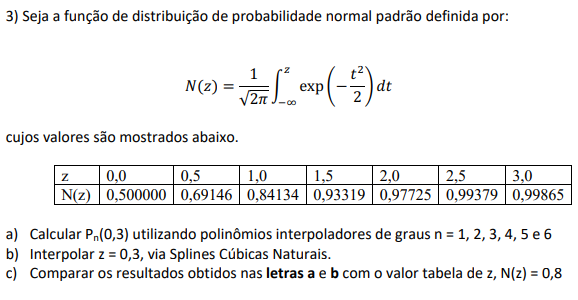

In [ ]:
# a)
print("a)\n")
valores_z = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
valores_Nz = [0.500000, 0.69146, 0.84134, 0.93319, 0.97725, 0.99379, 0.99865]
ponto_desejado = 0.3

# Calcula Pn(0,3) para diferentes graus de polinômio
for n in range(1, 7):
    polinomio = newton(n + 1, valores_z[:n + 1], valores_Nz[:n + 1], ponto_desejado)
    print(f'Grau {n}: Pn(0,3) = {polinomio:.6f}')

# b)
print("\nb)\n")

# Calcula Pn(0,3) usando Spline Cúbica Natural
polinomio_spline = spline(len(valores_z), valores_z, valores_Nz, ponto_desejado)
print(f'Spline Cúbica Natural: Pn(0,3) = {polinomio_spline:.6f}')

# c)
print("\nc)\n")

valor_tabela = 0.61791

# Comparação com o valor da tabela de z
for n in range(1, 7):
    polinomio = newton(n + 1, valores_z[:n + 1], valores_Nz[:n + 1], ponto_desejado)
    print(f'Grau {n}: Pn(0,3) = {polinomio:.6f}, Diferença em relação à tabela: {abs(polinomio - valor_tabela):.6f}')

polinomio_spline = spline(len(valores_z), valores_z, valores_Nz, ponto_desejado)
print(f'Spline Cúbica Natural: Pn(0,3) = {polinomio_spline:.6f}, Diferença em relação à tabela: {abs(polinomio_spline - valor_tabela):.6f}')

a)

Grau 1: Pn(0,3) = 0.614876
Grau 2: Pn(0,3) = 0.619866
Grau 3: Pn(0,3) = 0.618944
Grau 4: Pn(0,3) = 0.618048
Grau 5: Pn(0,3) = 0.617667
Grau 6: Pn(0,3) = 0.617630

b)

Spline Cúbica Natural: Pn(0,3) = 0.616367

c)

Grau 1: Pn(0,3) = 0.614876, Diferença em relação à tabela: 0.003034
Grau 2: Pn(0,3) = 0.619866, Diferença em relação à tabela: 0.001956
Grau 3: Pn(0,3) = 0.618944, Diferença em relação à tabela: 0.001034
Grau 4: Pn(0,3) = 0.618048, Diferença em relação à tabela: 0.000138
Grau 5: Pn(0,3) = 0.617667, Diferença em relação à tabela: 0.000243
Grau 6: Pn(0,3) = 0.617630, Diferença em relação à tabela: 0.000280
Spline Cúbica Natural: Pn(0,3) = 0.616367, Diferença em relação à tabela: 0.001543


Podemos verificar que a estimativa mais próxima é obtida com o polinômio de grau 4, com uma diferença de 0.000138 em relação ao valor tabelado. As diferenças entre as estimativas e o valor tabelado são menores com graus intermediários de polinômios, indicando que esses graus são mais adequados para a interpolação nesse contexto.

Além disso, a interpolação via Spline Cúbica Natural também se aproxima do valor tabelado, com uma diferença de 0.001543. Isso reforça a utilidade das splines para obter uma interpolação suave e precisa.

Portanto, levando em consideração o valor correto da tabela, podemos concluir que os polinômios de grau intermediário (4) e a Spline Cúbica Natural são as opções mais precisas para estimar o valor de N(z) em pontos intermediários.






#4.

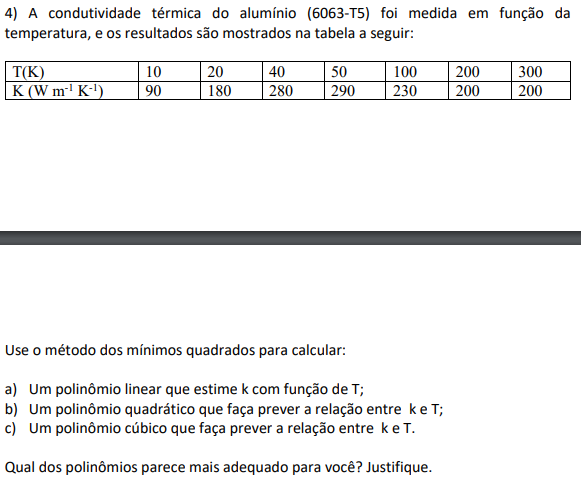

Coeficientes do polinômio linear: [2.07083840e+02 2.83515593e-02]
Coeficientes do polinômio quadrático: [ 1.67715640e+02  1.16869553e+00 -3.77227014e-03]
Coeficientes do polinômio cúbico: [ 8.32492203e+01  5.21923249e+00 -3.89954514e-02  7.64724664e-05]
R² do polinômio linear: 0.002084673480570731
R² do polinômio quadrático: 0.1985468536743914
R² do polinômio cúbico: 0.659803266685429


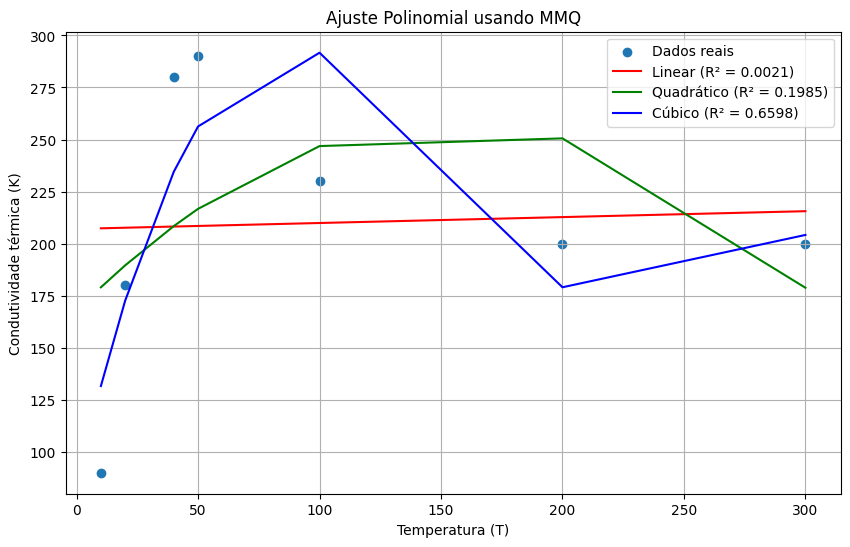

In [ ]:
# a)

# Dados da tabela
temperaturas = np.array([10, 20, 40, 50, 100, 200, 300])
condutividades = np.array([90, 180, 280, 290, 230, 200, 200])

grau_linear = 1
coeficientes_linear = mmq(temperaturas, condutividades, grau_linear)
print("Coeficientes do polinômio linear:", coeficientes_linear)

# b)

grau_quadratico = 2
coeficientes_quadratico = mmq(temperaturas, condutividades, grau_quadratico)
print("Coeficientes do polinômio quadrático:", coeficientes_quadratico)

# c)
grau_cubico = 3
coeficientes_cubico = mmq(temperaturas, condutividades, grau_cubico)
print("Coeficientes do polinômio cúbico:", coeficientes_cubico)

# Funções polinomiais
def polinomio_linear(x):
    return coeficientes_linear[0] + coeficientes_linear[1] * x

def polinomio_quadratico(x):
    return coeficientes_quadratico[0] + coeficientes_quadratico[1] * x + coeficientes_quadratico[2] * x**2

def polinomio_cubico(x):
    return coeficientes_cubico[0] + coeficientes_cubico[1] * x + coeficientes_cubico[2] * x**2 + coeficientes_cubico[3] * x**3

# Dados estimados pelos polinômios
condutividades_estimadas_linear = polinomio_linear(temperaturas)
condutividades_estimadas_quadratico = polinomio_quadratico(temperaturas)
condutividades_estimadas_cubico = polinomio_cubico(temperaturas)

# Cálculo do coeficiente de determinação (R²)
def coeficiente_determinacao(y_real, y_estimado):
    y_medio = np.mean(y_real)
    ss_total = np.sum((y_real - y_medio)**2)
    ss_residuo = np.sum((y_real - y_estimado)**2)
    r_squared = 1 - (ss_residuo / ss_total)
    return r_squared

r_squared_linear = coeficiente_determinacao(condutividades, condutividades_estimadas_linear)
r_squared_quadratico = coeficiente_determinacao(condutividades, condutividades_estimadas_quadratico)
r_squared_cubico = coeficiente_determinacao(condutividades, condutividades_estimadas_cubico)

print("R² do polinômio linear:", r_squared_linear)
print("R² do polinômio quadrático:", r_squared_quadratico)
print("R² do polinômio cúbico:", r_squared_cubico)

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(temperaturas, condutividades, label="Dados reais")
plt.plot(temperaturas, condutividades_estimadas_linear, label=f"Linear (R² = {r_squared_linear:.4f})", color='red')
plt.plot(temperaturas, condutividades_estimadas_quadratico, label=f"Quadrático (R² = {r_squared_quadratico:.4f})", color='green')
plt.plot(temperaturas, condutividades_estimadas_cubico, label=f"Cúbico (R² = {r_squared_cubico:.4f})", color='blue')
plt.xlabel("Temperatura (T)")
plt.ylabel("Condutividade térmica (K)")
plt.title("Ajuste Polinomial usando MMQ")
plt.legend()
plt.grid(True)
plt.show()

A análise visual dos gráficos e a comparação dos valores de R² indicam que o polinômio cúbico parece ser o mais adequado para modelar a relação entre a condutividade térmica (k) e a temperatura (T) nesse caso. Ele apresenta um ajuste mais preciso aos dados e um valor de R² mais próximo de 1, indicando uma boa capacidade de explicar a variabilidade nos dados. Portanto, o polinômio cúbico é a escolha preferida para estimar essa relação.